# <font color="#B70404">SMahdi HajiSeyedHossein </font>

# <font color="#DB005B">Project #5 Second Phase </font>



### <font color="#F79327">This project was the Image Classification using CNN(Convolutional Neural Network)</font>


#### <font color="#DB005B">

0.   In zero part we download the dataset and then normaliaze it and then make it better using diffrent methods ot FEATURE ENGIENIEENG 
1.   Then we made a model with simple CNN on a eqaul distribiuted data
2.   In the second part we will delete some data to see the effects of an UNBALENCED dataset 
3.   After that we will use some DATA AUGMENTATION method to make the previues dataset better
4.   In the final section we will add some Regularization method to our model to rescue it from OVERFITTING like BATCH-NORMALIZATION and DROPOUT layers

</font>








In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import tensorflow.keras.datasets as ds
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical

<font color="#F79327">The CIFAR-10 dataset is a widely used benchmark dataset for image classification tasks. It is included in the Keras deep learning library and consists of 50,000 training images and 10,000 testing images. The images are color images with a resolution of 32x32 pixels.


<br>
The dataset contains 10 different classes, each representing a specific object or category. The classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.</font>

In [3]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


# <font color="#DB005B">PART 0: </font> 

In [4]:
imagesName = {0 : 'airplane' , 
              1 : 'automobile' ,
              2 : 'bird' ,
              3 : 'cat' , 
              4 : 'deer' , 
              5 : 'dog' , 
              6 : 'frog' ,
              7 : 'horse' , 
              8 : 'ship' , 
              9 : 'truck'
}


In [5]:

def plotImageDist (dist , imageOrder):
    fig = plt.figure()
    
    ax = fig.add_axes([0,0,1,1])
    
    names = imageOrder
    sizes = dist
    ax.bar(names,sizes , color = ['#004726' , '#006b39' , '#008e4c' , '#00b260' , '#00d673' , '#00f986' , '#1eff97' , '#42ffa6' , '#66ffb8' ,'#89ffc8'])
    plt.xticks(rotation=70)
    plt.show()
    


In [6]:
def calculateDist (ys):
    dis = [0,0,0,0,0,0,0,0,0,0]
    for i in ys :
        dis[int(i)] += 1
    return dis

In [7]:
calculateDist(y_train)

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

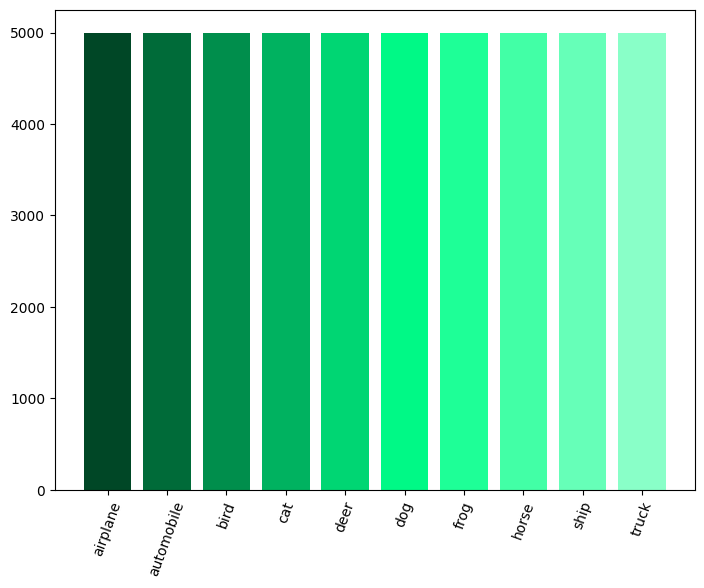

In [8]:
plotImageDist(calculateDist(y_train) , list(imagesName.values()))

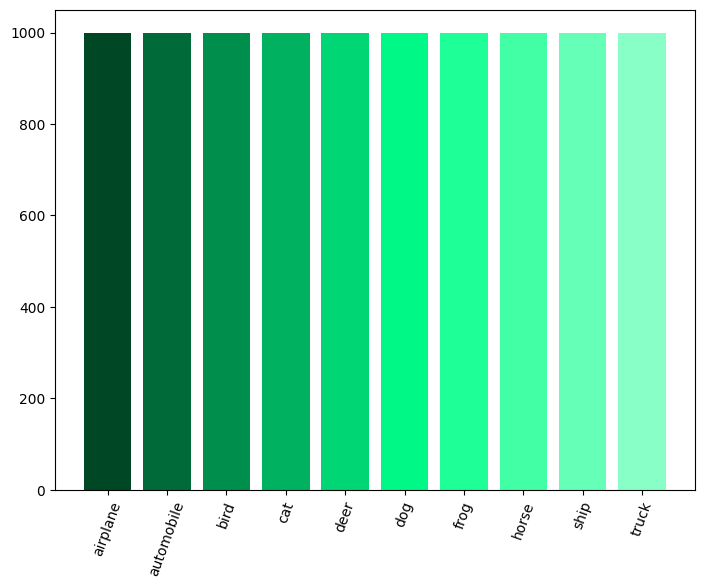

In [9]:
plotImageDist(calculateDist(y_test) , list(imagesName.values()))

In [10]:
def plotSample (x):
    plt.figure(figsize=(10, 5))
    for i in imagesName.keys():
        for j in range(len(x)):
            if y_train[j][0] == i :
                plt.imshow(x[j])
                plt.title(imagesName[y_train[j][0]])
                plt.axis('off')
                plt.show()
                break

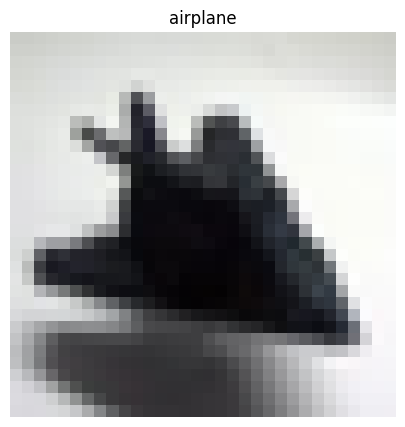

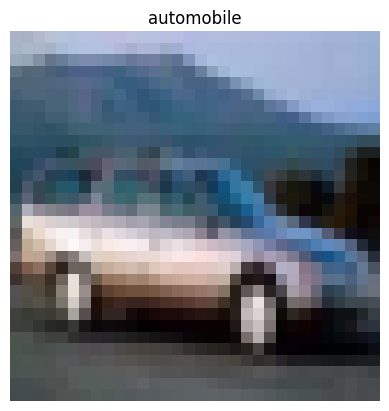

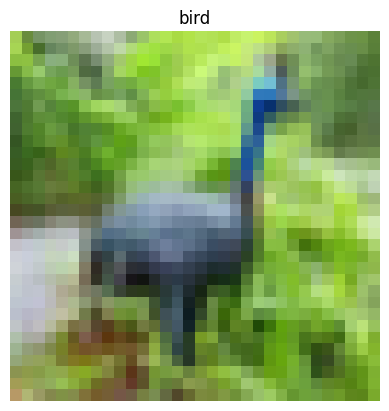

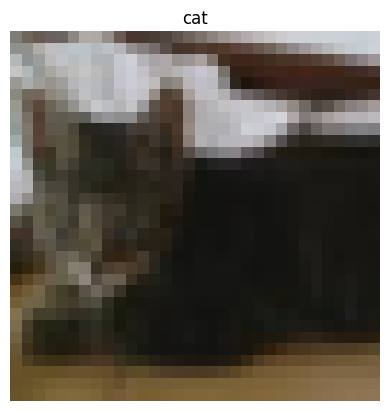

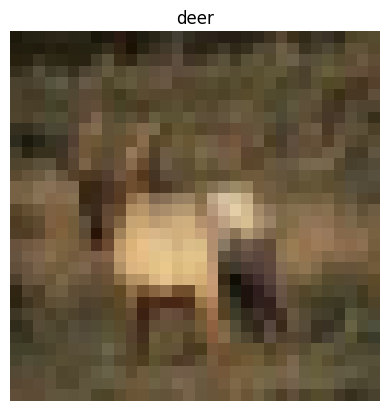

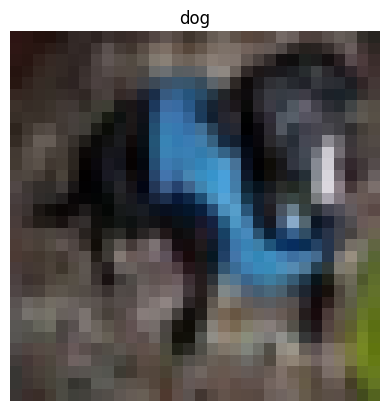

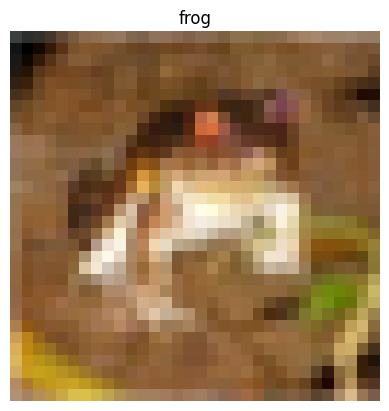

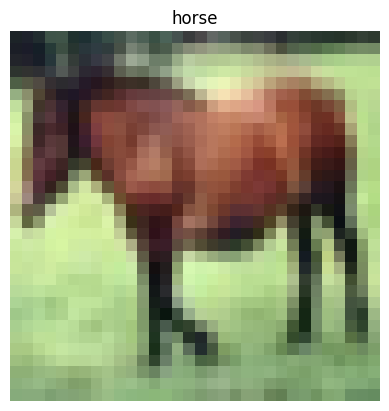

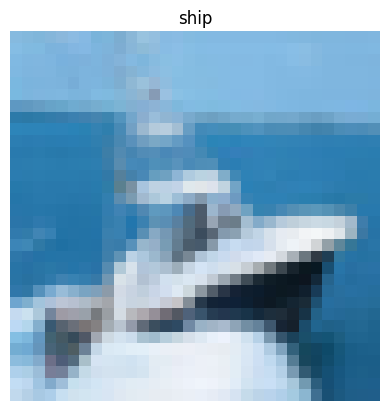

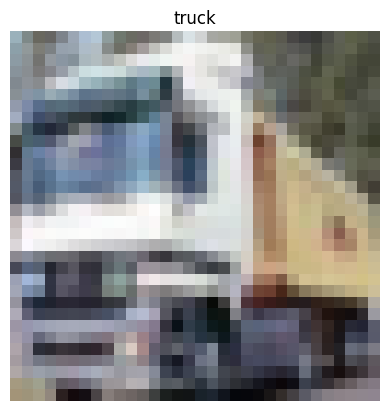

In [11]:
plotSample(x_train)

In [12]:
print("Length of the train data : " , len(x_train))
print("Length of the test data : " , len(x_test))


Length of the train data :  50000
Length of the test data :  10000


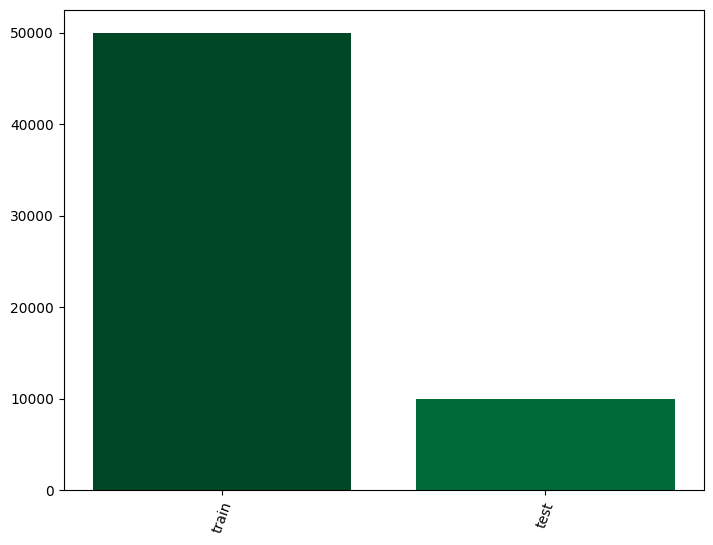

In [13]:
plotImageDist([len(x_train),len(x_test)] , ['train' , 'test'])

In [14]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [15]:
unpreprocess_x_train = x_train
unpreprocess_x_test = x_test


x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [16]:
x_train[0][0]

array([[-4.0939003e+01, -5.4778999e+01, -6.4680000e+01],
       [-5.8939003e+01, -7.0778999e+01, -8.0680000e+01],
       [-6.0939003e+01, -6.8778999e+01, -7.3680000e+01],
       [-6.1939003e+01, -6.2778999e+01, -5.5680000e+01],
       [-5.1939003e+01, -4.3778999e+01, -2.5680000e+01],
       [-4.0939003e+01, -2.5778999e+01, -4.6800003e+00],
       [-2.8939003e+01, -9.7789993e+00,  1.5320000e+01],
       [-2.3939003e+01, -6.7789993e+00,  2.1320000e+01],
       [-1.4939003e+01,  2.2100067e-01,  2.5320000e+01],
       [-1.0939003e+01,  3.2210007e+00,  2.5320000e+01],
       [-2.6939003e+01, -1.3778999e+01,  7.3199997e+00],
       [-2.7939003e+01, -1.7778999e+01,  1.3199997e+00],
       [-1.2939003e+01, -1.7789993e+00,  1.8320000e+01],
       [-1.7939003e+01, -4.7789993e+00,  2.0320000e+01],
       [-2.4939003e+01, -1.1778999e+01,  1.3320000e+01],
       [-3.2939003e+01, -1.9778999e+01,  5.3199997e+00],
       [-2.4939003e+01, -1.0778999e+01,  1.3320000e+01],
       [-2.7939003e+01, -1.0778

In [17]:
onehot_test = to_categorical(y_test , num_classes=10)
onehot_train = to_categorical(y_train , num_classes=10)

In [18]:
onehot_test[0:15]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
y_test[0:15]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1],
       [0],
       [9],
       [5],
       [7],
       [9]], dtype=uint8)

# <font color="#DB005B">PART 1: </font>


### <font color="#F79327">ADAM OPTIMAZIER :</font>
##### <font color="#F79327">Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
<br>
The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:
<br>

*    <font color="#F79327">Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
<br></font>
*    <font color="#F79327">Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).
Adam realizes the benefits of both AdaGrad and RMSProp.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance). </font>

In [20]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Input, Flatten
from sklearn.metrics import classification_report
import numpy as np

In [21]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn.add(Activation('relu'))

cnn.add(Conv2D(32, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, (3, 3), padding='same'))
cnn.add(Activation('relu'))

cnn.add(Conv2D(64, (3, 3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512))
cnn.add(Activation('relu'))

cnn.add(Dense(10))


cnn.add(Activation('softmax'))

cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

log = cnn.fit(x_train, onehot_train, batch_size=32, epochs=25, validation_data=(x_test,onehot_test))

Epoch 1/25
1563/1563 [==============================] - 21s 7ms/step - loss: 1.5905 - accuracy: 0.4499 - val_loss: 1.2100 - val_accuracy: 0.5676
Epoch 2/25
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0837 - accuracy: 0.6218 - val_loss: 1.0315 - val_accuracy: 0.6458
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9047 - accuracy: 0.6863 - val_loss: 1.0612 - val_accuracy: 0.6439
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7807 - accuracy: 0.7289 - val_loss: 0.9975 - val_accuracy: 0.6735
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6732 - accuracy: 0.7687 - val_loss: 1.0227 - val_accuracy: 0.6771
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5697 - accuracy: 0.8040 - val_loss: 1.0536 - val_accuracy: 0.6912
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4823 - accuracy: 0.8327 - val_loss: 1.2135 - val_accura

In [22]:


def plot_loss_accuracy(history):

    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Plot loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


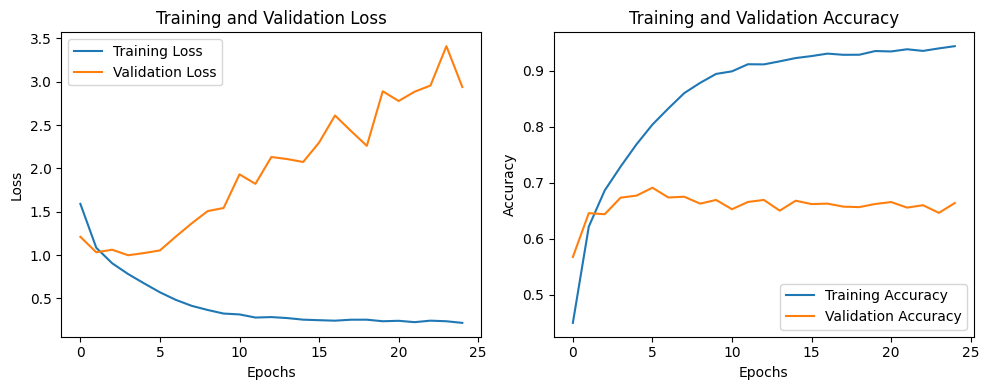

In [23]:
plot_loss_accuracy(log)

In [24]:
def predictOnTest (model , x_test ):
    y_pred_test = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred_test, axis=1)
    return y_pred_classes

In [28]:
y_pred_classes = predictOnTest(cnn , x_test)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [30]:
def modelClassifyReport (y_test , y_pred_classes):
    print (classification_report(y_test , y_pred_classes))
    sns.heatmap(pd.DataFrame(classification_report(y_test , y_pred_classes, output_dict=True)).iloc[:-1, :].T, annot=True)
    
    
    
    
    
    

In [43]:
resultOfpart1 = classification_report(y_test , y_pred_classes, output_dict=True)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1000
           1       0.80      0.80      0.80      1000
           2       0.56      0.56      0.56      1000
           3       0.43      0.45      0.44      1000
           4       0.62      0.57      0.59      1000
           5       0.57      0.56      0.56      1000
           6       0.71      0.76      0.74      1000
           7       0.74      0.69      0.72      1000
           8       0.78      0.77      0.77      1000
           9       0.73      0.79      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



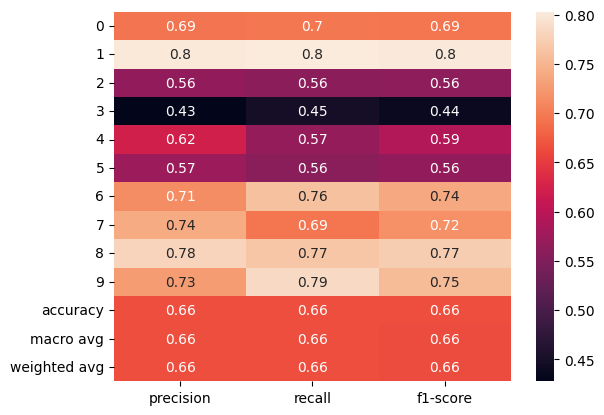

In [44]:
modelClassifyReport(y_test , y_pred_class)

# <font color="#DB005B">PART 2: </font> 
### <font color="#F79327">Unbalanced Data</font>

In [30]:
import random

In [31]:
def delete80ofTwoClass (x_train , y_train):
    y_t = y_train.copy()
    x_t = x_train.copy()
    
    count_1 = np.count_nonzero(y_t == 1)
    count_0 = np.count_nonzero(y_t == 0)
    
    num_samples_to_remove_1 = int(0.8 * count_1)
    num_samples_to_remove_0 = int(0.8 * count_0)
    
    indices_1 = np.where(y_t == 1)[0]
    chosen_1 = random.sample(indices_1.tolist(), num_samples_to_remove_1)
    
    indices_0 = np.where(y_t == 0)[0]
    chosen_0 = random.sample(indices_0.tolist(), num_samples_to_remove_0)
    
    
    
    
    y_t = np.delete(y_t, chosen_1+chosen_0 , axis=0)

    
    x_t = np.delete(x_t, chosen_1+chosen_0 , axis=0)
    
    return x_t , y_t

In [32]:
unbalanced_x_train , unbalanced_y_train = delete80ofTwoClass(x_train , y_train)

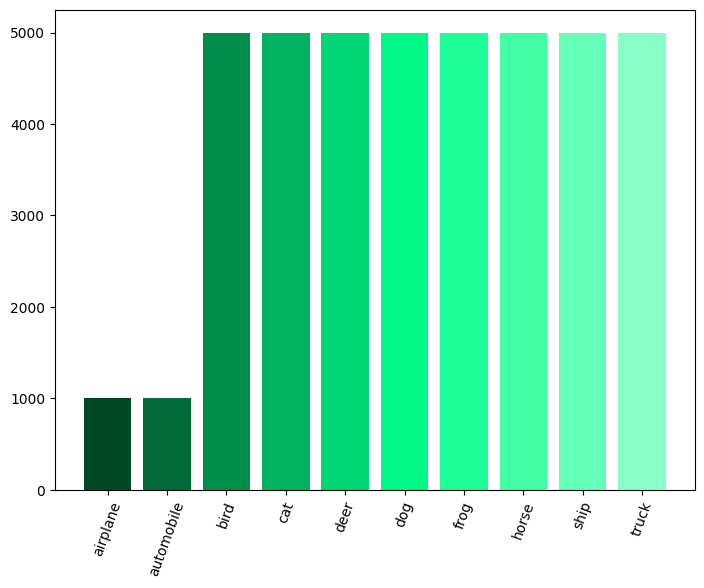

In [33]:
plotImageDist(calculateDist(unbalanced_y_train) , list(imagesName.values()))

In [34]:
onehot_unbalanced_train = to_categorical(unbalanced_y_train , num_classes=10)

In [35]:
len(onehot_unbalanced_train)

42000

In [36]:
onehot_unbalanced_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [38]:
cnn2 = Sequential()

cnn2.add(Conv2D(32, (3, 3), padding='same', input_shape=unbalanced_x_train.shape[1:]))
cnn2.add(Activation('relu'))

cnn2.add(Conv2D(32, (3, 3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

cnn2.add(Conv2D(64, (3, 3), padding='same'))
cnn2.add(Activation('relu'))

cnn2.add(Conv2D(64, (3, 3)))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))

cnn2.add(Flatten())
cnn2.add(Dense(512))
cnn2.add(Activation('relu'))

cnn2.add(Dense(10))


cnn2.add(Activation('softmax'))

cnn2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

log2 = cnn2.fit( unbalanced_x_train , onehot_unbalanced_train , batch_size=32, epochs=25, validation_data=(x_test,onehot_test))

Epoch 1/25
1313/1313 [==============================] - 14s 7ms/step - loss: 1.6178 - accuracy: 0.4637 - val_loss: 1.4836 - val_accuracy: 0.4898
Epoch 2/25
1313/1313 [==============================] - 7s 6ms/step - loss: 1.1031 - accuracy: 0.6155 - val_loss: 1.1534 - val_accuracy: 0.5978
Epoch 3/25
1313/1313 [==============================] - 7s 6ms/step - loss: 0.9051 - accuracy: 0.6872 - val_loss: 1.1568 - val_accuracy: 0.6122
Epoch 4/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7602 - accuracy: 0.7352 - val_loss: 1.2371 - val_accuracy: 0.6150
Epoch 5/25
1313/1313 [==============================] - 7s 6ms/step - loss: 0.6304 - accuracy: 0.7810 - val_loss: 1.2928 - val_accuracy: 0.6301
Epoch 6/25
1313/1313 [==============================] - 7s 6ms/step - loss: 0.5129 - accuracy: 0.8234 - val_loss: 1.2547 - val_accuracy: 0.6461
Epoch 7/25
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4048 - accuracy: 0.8604 - val_loss: 1.5637 - val_accuracy

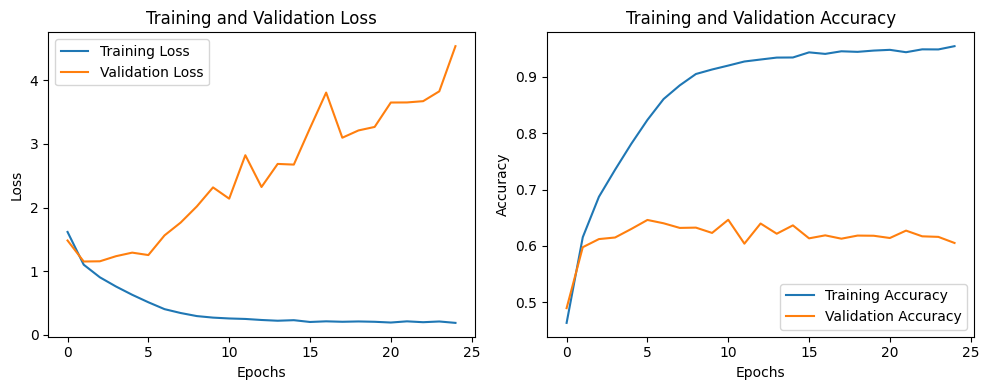

In [39]:
plot_loss_accuracy(log2)

In [40]:
unbalanced_y_pred_class = predictOnTest(cnn2 , x_test)

313/313 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.78      0.34      0.48      1000
           1       0.90      0.43      0.58      1000
           2       0.49      0.59      0.53      1000
           3       0.47      0.45      0.46      1000
           4       0.55      0.59      0.57      1000
           5       0.56      0.57      0.56      1000
           6       0.59      0.83      0.69      1000
           7       0.66      0.73      0.70      1000
           8       0.67      0.77      0.71      1000
           9       0.66      0.74      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.63      0.61      0.60     10000
weighted avg       0.63      0.61      0.60     10000



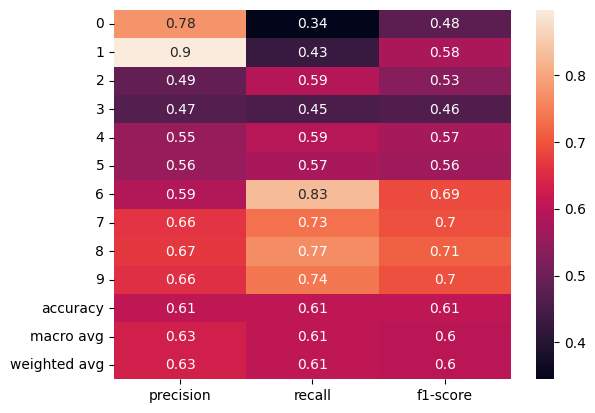

In [41]:
modelClassifyReport(y_test , unbalanced_y_pred_class)

#### <font color="#DB005B"> AIRPLANE : F1 --> (part 1: 70% ) -- (part 2: 48%) --> (-22%)
#### <font color="#DB005B">AIRPLANE : Recall --> (part 1: 68% ) -- (part 2: 34%) --> (-34%)

#### <font color="#DB005B"> AUTOMOBILE : F1 --> (part 1: 83% ) -- (part 2: 58%) --> (-25%)
#### <font color="#DB005B"> AUTOMOBILE : Recall --> (part 1: 84% ) -- (part 2: 43%) --> (-41%)

### <font color="#F79327"> Convolutional Neural Networks (CNNs) can face challenges when dealing with unbalanced datasets, especially when certain classes have a significantly lower quantity of samples compared to others. The following factors contribute to the difficulty:
</font>

### <font color="#F79327"> 
 *  Insufficient training data: With a low quantity of images for certain classes, the CNN may not have enough examples to effectively learn and generalize the distinguishing features of those classes. This can lead to poor performance and difficulty in correctly classifying images from underrepresented classes.</font>
### <font color="#F79327"> 
 *  Biased model training: Due to the imbalanced nature of the dataset, the model may become biased towards the majority classes during training. The model's learning process may prioritize these classes, resulting in reduced accuracy for the minority classes.

<h3 style='color:#FF5403;'>PART #3 : DATA AUGMENTATION</h3>

In [42]:
from tensorflow.keras.layers import RandomFlip , RandomRotation , RandomZoom  , RandomContrast

In [43]:
def plotAnImage (image , label):
    plt.figure(figsize=(10, 5))

    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()


In [48]:
ImagesName = imagesName

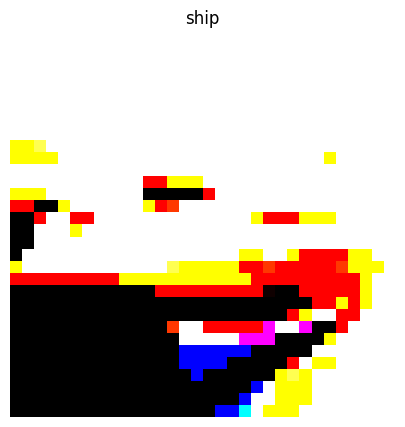

In [49]:
plotAnImage(x_test[1] , ImagesName[y_test[1][0]])

In [50]:
flipper = RandomFlip(mode='vertical')

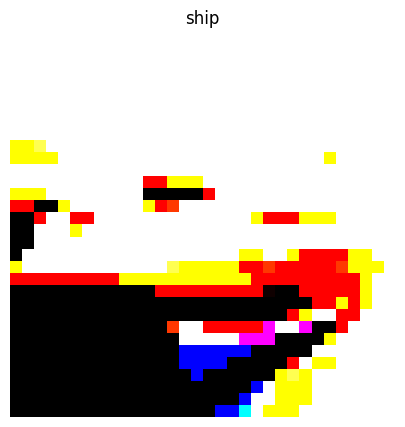

In [51]:
plotAnImage(flipper(x_test[1]) , ImagesName[y_test[1][0]] )

In [52]:
rotator = RandomRotation(factor=0.15)

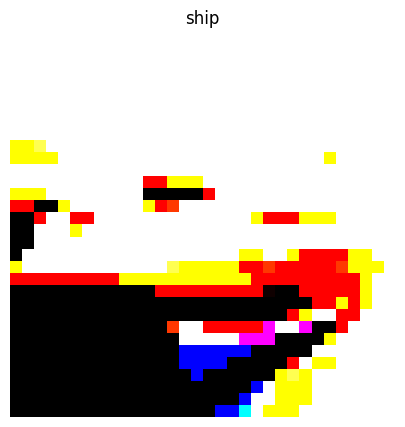

In [53]:
plotAnImage((x_test[1]) , ImagesName[y_test[1][0]] )

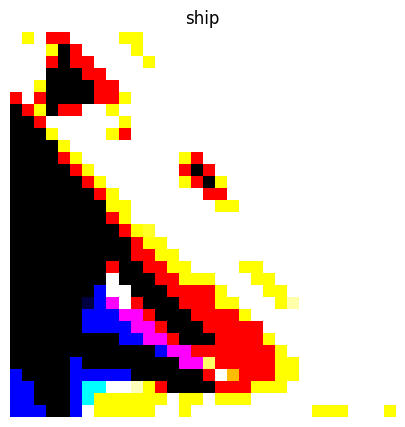

In [54]:
plotAnImage(rotator(x_test[1]) , ImagesName[y_test[1][0]] )

In [55]:
zoomer = RandomZoom(height_factor=(-0.2, -0.1), width_factor=(-0.2, -0.1))

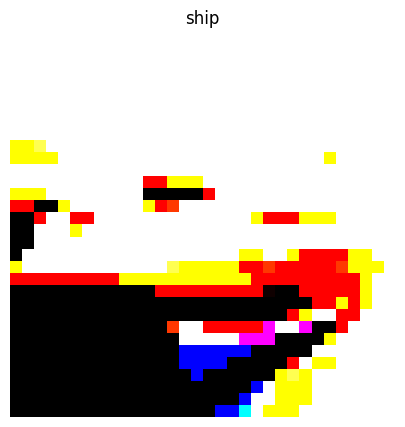

In [56]:
plotAnImage((x_test[1]) , ImagesName[y_test[1][0]] )

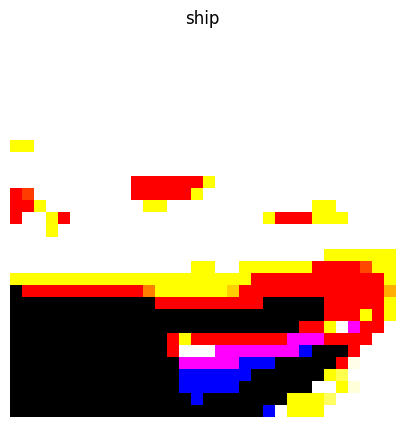

In [57]:
plotAnImage(zoomer(x_test[1]) , ImagesName[y_test[1][0]] )

In [58]:
contrastor = RandomContrast(0.2)

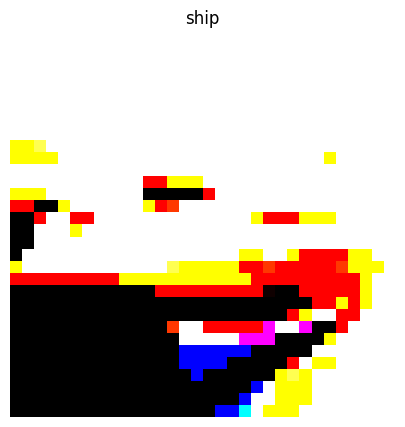

In [59]:
plotAnImage((x_test[1]) , ImagesName[y_test[1][0]] )

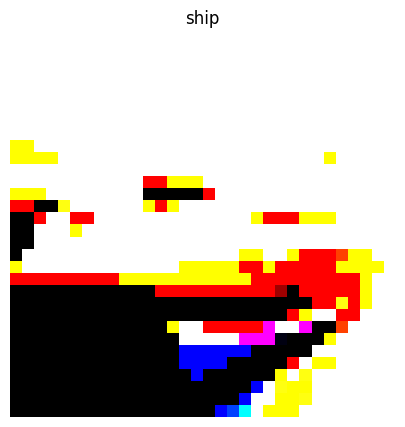

In [60]:
plotAnImage(contrastor(x_test[1]) , ImagesName[y_test[1][0]] )

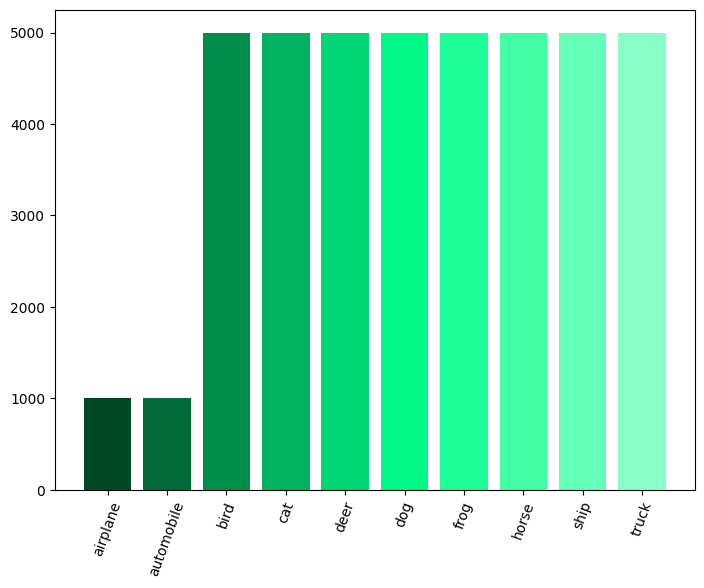

In [62]:
plotImageDist(calculateDist(unbalanced_y_train) , list(imagesName.values()))

In [64]:
boolean_index1 = np.squeeze(unbalanced_y_train == 1)
augmented_images1 = unbalanced_x_train[boolean_index1 == True]

In [65]:
boolean_index0 = np.squeeze(unbalanced_y_train == 0)
augmented_images0 = unbalanced_x_train[boolean_index0 == True]

In [66]:
augmented_images0_f = flipper(augmented_images0)
augmented_images0_z = rotator(augmented_images0)
augmented_images0_r = zoomer(augmented_images0)
augmented_images0_c = contrastor(augmented_images0)



augmented_images1_f = flipper(augmented_images1)
augmented_images1_z = rotator(augmented_images1)
augmented_images1_r = zoomer(augmented_images1)
augmented_images1_c = contrastor(augmented_images1)


In [67]:
x_train_augmented = np.concatenate([unbalanced_x_train ,
                                    augmented_images0_f ,
                                    augmented_images0_r ,
                                    augmented_images0_z ,
                                    augmented_images0_c , 
                                    augmented_images1_f ,
                                    augmented_images1_r ,
                                    augmented_images1_z ,
                                    augmented_images1_c])


y_train_augmented = np.concatenate([unbalanced_y_train ,
                                    np.full((4*len(augmented_images0),), 0).reshape((4*len(augmented_images0), 1)),
                                    np.full((4*len(augmented_images0),), 1).reshape((4*len(augmented_images1), 1))])

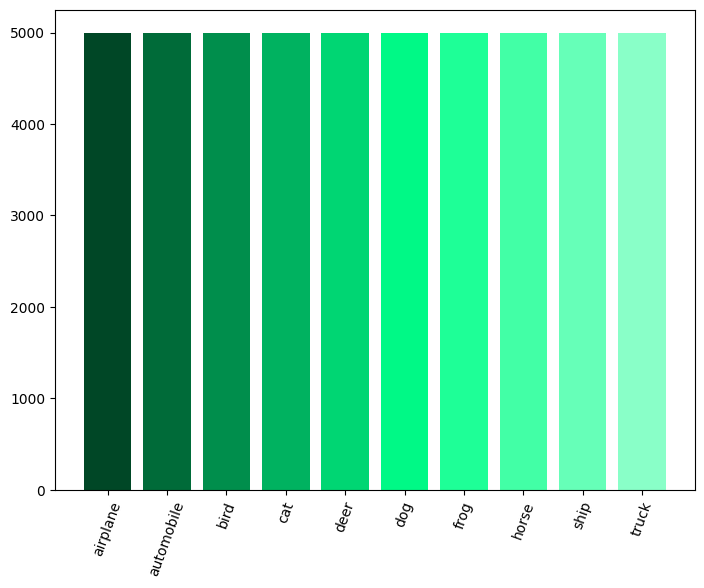

In [68]:
plotImageDist(calculateDist(y_train_augmented) , list(imagesName.values()))

In [69]:
onehot_train_augment = to_categorical(y_train_augmented , num_classes=10)

In [70]:
onehot_train_augment

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
len(onehot_train_augment)

50000

In [72]:
cnn3 = Sequential()

cnn3.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train_augmented.shape[1:]))
cnn3.add(Activation('relu'))

cnn3.add(Conv2D(32, (3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))

cnn3.add(Conv2D(64, (3, 3), padding='same'))
cnn3.add(Activation('relu'))

cnn3.add(Conv2D(64, (3, 3)))
cnn3.add(Activation('relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))

cnn3.add(Flatten())
cnn3.add(Dense(512))
cnn3.add(Activation('relu'))

cnn3.add(Dense(10))


cnn3.add(Activation('softmax'))

cnn3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

log3 = cnn3.fit( x_train_augmented , onehot_train_augment , batch_size=32, epochs=25, validation_data=(x_test,onehot_test))

Epoch 1/25
1563/1563 [==============================] - 11s 6ms/step - loss: 1.6358 - accuracy: 0.4290 - val_loss: 1.2737 - val_accuracy: 0.5596
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1211 - accuracy: 0.6115 - val_loss: 1.0580 - val_accuracy: 0.6321
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9179 - accuracy: 0.6837 - val_loss: 1.1176 - val_accuracy: 0.6341
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7736 - accuracy: 0.7329 - val_loss: 1.0771 - val_accuracy: 0.6614
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6453 - accuracy: 0.7760 - val_loss: 1.1344 - val_accuracy: 0.6555
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5263 - accuracy: 0.8199 - val_loss: 1.2600 - val_accuracy: 0.6469
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4411 - accuracy: 0.8487 - val_loss: 1.3553 - val_accurac

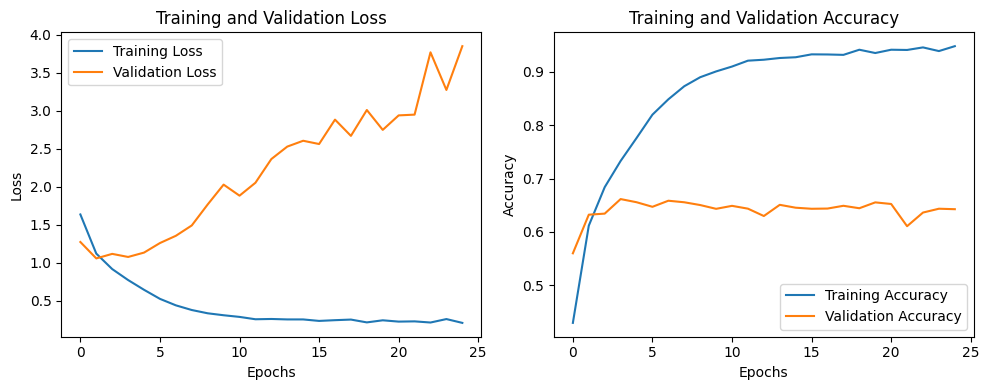

In [73]:
plot_loss_accuracy(log3)

In [74]:
augmented_y_pred_class = predictOnTest(cnn3 , x_test)

313/313 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.69      0.60      0.64      1000
           1       0.74      0.69      0.71      1000
           2       0.59      0.51      0.55      1000
           3       0.44      0.51      0.47      1000
           4       0.60      0.60      0.60      1000
           5       0.56      0.55      0.55      1000
           6       0.78      0.68      0.72      1000
           7       0.68      0.72      0.70      1000
           8       0.71      0.78      0.74      1000
           9       0.68      0.79      0.73      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



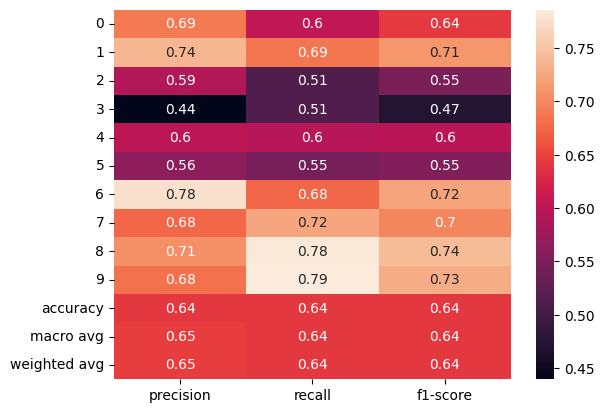

In [75]:
modelClassifyReport(y_test , augmented_y_pred_class)

#### <font color="#DB005B"> AIRPLANE : F1 --> (part 2: 48% ) -- (part 3: 64%) --> (+16%)
#### <font color="#DB005B">AIRPLANE : Recall --> (part 2: 34% ) -- (part 3: 60%) --> (+26%)

#### <font color="#DB005B"> AUTOMOBILE : F1 --> (part 2: 58% ) -- (part 3: 71%) --> (+13%)
#### <font color="#DB005B"> AUTOMOBILE : Recall --> (part 2: 43% ) -- (part 2: 69%) --> (+26%)


# <font color="#DB005B">PART #4 : Regularization

<font color="#F79327">Dropout and Batch Normalization are regularization techniques commonly used in deep neural networks to improve the model's generalization and training stability. Here's a brief explanation of each:

1. <font color="#F79327">Dropout Layer: Dropout is a regularization technique that helps prevent overfitting in neural networks. It randomly selects a subset of neurons in a layer and "drops out" or deactivates them during each training step. This forces the network to learn more robust and redundant features, as it cannot rely too heavily on specific neurons. Dropout helps reduce interdependence among neurons, making the network more resilient to noise and improving its generalization performance. During inference or testing, all neurons are active, but their outputs are scaled by the dropout probability used during training.
<br><br><br>
2. <font color="#F79327">Batch Normalization Layer: Batch Normalization is a technique used to normalize the inputs to a layer in a neural network. It normalizes the activations of a layer by subtracting the batch mean and dividing by the batch standard deviation. This helps stabilize the network's training process by reducing the internal covariate shift, which refers to the change in the distribution of layer inputs during training. Batch Normalization ensures that each layer's inputs have zero mean and unit variance, which helps in faster and more stable convergence. Additionally, it provides some regularizing effect, reducing the reliance on specific weight configurations.
</font>
<br>

<font color="#DB005B">
In summary, Dropout randomly deactivates neurons during training to prevent overfitting, while Batch Normalization normalizes the inputs to each layer, improving training stability and accelerating convergence. Both techniques are widely used to improve the performance and generalization of deep neural networks.

In [36]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [37]:
cnn4 = Sequential()

cnn4.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
cnn4.add(Activation('relu'))
####
cnn4.add(BatchNormalization())  # Add BatchNormalization layer
####


cnn4.add(Conv2D(32, (3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(64, (3, 3), padding='same'))
cnn4.add(Activation('relu'))
####
cnn4.add(BatchNormalization())  # Add BatchNormalization layer
####



cnn4.add(Conv2D(64, (3, 3)))
cnn4.add(Activation('relu'))
cnn4.add(MaxPooling2D(pool_size=(2, 2)))

cnn4.add(Flatten())
cnn4.add(Dense(512))
cnn4.add(Activation('relu'))

####
cnn4.add(Dropout(0.4))  # Add a Dropout layer with a rate of 0.4 (40% dropout)
####


cnn4.add(Dense(10))


cnn4.add(Activation('softmax'))

cnn4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

log4 = cnn4.fit(x_train, onehot_train, batch_size=32, epochs=25, validation_data=(x_test,onehot_test))

Epoch 1/25
1563/1563 [==============================] - 13s 7ms/step - loss: 1.3878 - accuracy: 0.5079 - val_loss: 1.0206 - val_accuracy: 0.6402
Epoch 2/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9581 - accuracy: 0.6649 - val_loss: 0.8554 - val_accuracy: 0.7034
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7925 - accuracy: 0.7253 - val_loss: 0.7507 - val_accuracy: 0.7394
Epoch 4/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6804 - accuracy: 0.7674 - val_loss: 0.7757 - val_accuracy: 0.7335
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5886 - accuracy: 0.7964 - val_loss: 0.7295 - val_accuracy: 0.7549
Epoch 6/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5042 - accuracy: 0.8259 - val_loss: 0.7099 - val_accuracy: 0.7695
Epoch 7/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4416 - accuracy: 0.8449 - val_loss: 0.7295 - val_ac

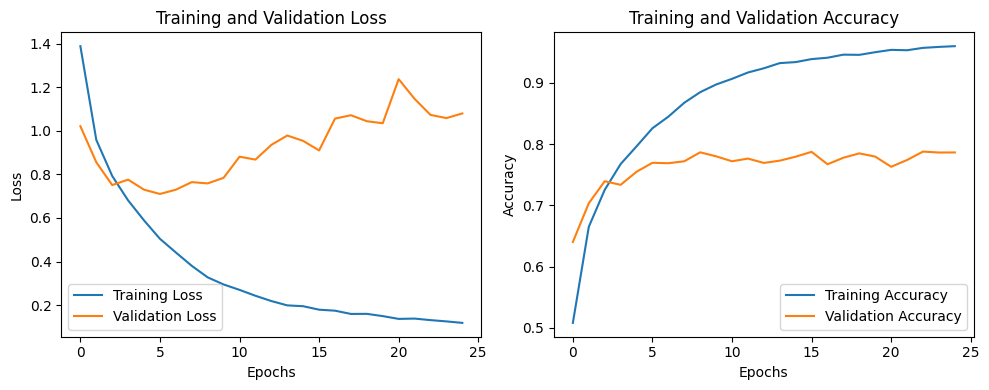

In [38]:
plot_loss_accuracy(log4)

In [39]:
reg_y_pred_class = predictOnTest(cnn4 , x_test)

313/313 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.87      0.92      0.89      1000
           2       0.74      0.65      0.69      1000
           3       0.60      0.62      0.61      1000
           4       0.76      0.75      0.76      1000
           5       0.70      0.67      0.68      1000
           6       0.83      0.83      0.83      1000
           7       0.84      0.83      0.84      1000
           8       0.90      0.88      0.89      1000
           9       0.84      0.88      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



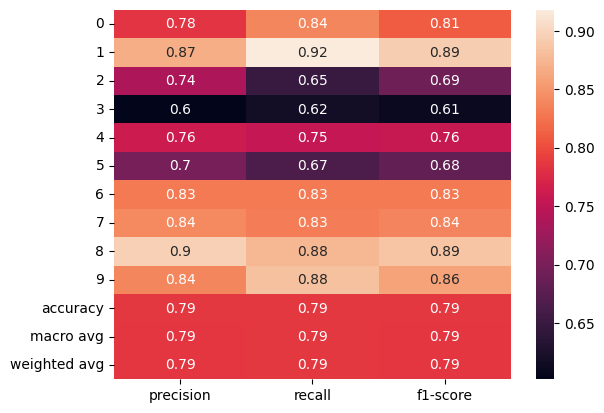

In [40]:
modelClassifyReport(y_test , reg_y_pred_class)

In [41]:
resultOfpart4 = classification_report(y_test , reg_y_pred_class, output_dict=True)

# <font color="#B70404">TOTAL ACCURACY OF PART1 was : 68%</font>
# <font color="#B70404">TOTAL ACCURACY OF PART4 was : 79%</font>

In [62]:
F1_part1 = {}
for i in range(10):
  F1_part1[imagesName[i]] = resultOfpart1[str(i)]['f1-score']


In [63]:
F1_part4 = {}
for i in range(10):
  F1_part4[imagesName[i]] = resultOfpart4[str(i)]['f1-score']


In [68]:
def plot_line_chart(chart , data_dict1, data_dict2):
    x = list(data_dict1.keys())
    y1 = list(data_dict1.values())
    y2 = list(data_dict2.values())

    
    plt.plot(x, y1, label='NOT REGULIZED' , color="red")
    plt.plot(x, y2, label='REGULIZED' , color='green')

    
    
    plt.xlabel('images')
    plt.ylabel(chart)
    plt.title('Comparison ' + chart)
    #plt.gca().invert_yaxis()
    #plt.xticks(range(0, 10))

    plt.xticks(rotation=90)


    plt.legend()
    plt.show()

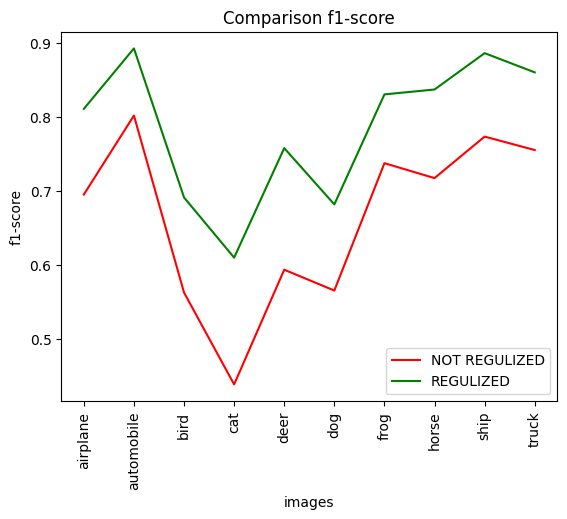

In [69]:
plot_line_chart("f1-score" , F1_part1 , F1_part4)

In [71]:
recall_part1 = {}
for i in range(10):
  recall_part1[imagesName[i]] = resultOfpart1[str(i)]['recall']


In [72]:
recall_part4 = {}
for i in range(10):
  recall_part4[imagesName[i]] = resultOfpart4[str(i)]['recall']



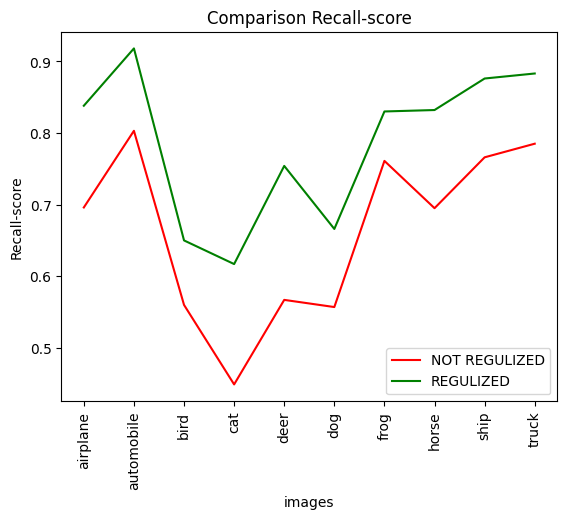

In [73]:
plot_line_chart('Recall-score' , recall_part1 , recall_part4)


## <font color="#DB005B">References: 
1.   Keras offical website : www.keras.io
2.   www.machinelearningmastery.com
3.   www.analyticsvidhya.com
4.   https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm
5.   https://colorhunt.co/palette/b70404db005bf79327ffe569